In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option('display.max_rows', 10)
# %matplotlib inline

In [110]:
#initialise the number of weeks for the dataset
num_weeks = 2

#initialise the date for the first week of the dataset (week ending on start_date)
startdate = filedate = pd.Timestamp('2020-08-22 00:00:00')

#initialise the regex for the MTA turnstile url
filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"

filelist = []

for numfiles in range (num_weeks):

    # create the appropriate filename for the week
    filedate_str = str(filedate.year)[-2:] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    # read the file and append it to the list of files to be concatenated
    df = pd.read_csv(filename,parse_dates=['DATE'])
    filelist.append(df)

    # advance to the next week
    filedate += pd.Timedelta(days=7)

df = pd.concat(filelist, axis=0,ignore_index=True)

In [111]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-15,00:00:00,REGULAR,7444885,2531033
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-15,04:00:00,REGULAR,7444886,2531034
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-15,08:00:00,REGULAR,7444899,2531046
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-15,12:00:00,REGULAR,7444933,2531082
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-15,16:00:00,REGULAR,7445032,2531110
...,...,...,...,...,...,...,...,...,...,...,...
427588,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-28,05:00:00,REGULAR,5554,540
427589,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-28,09:00:00,REGULAR,5554,540
427590,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-28,13:00:00,REGULAR,5554,540
427591,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-28,17:00:00,REGULAR,5554,540


In [112]:
df.groupby(['UNIT','SCP'])['STATION'].nunique().sort_values()  
#checking combination of 'UNIT' and 'SCP' is unique to each station,implying each combination refers to a unique turnstile

UNIT  SCP     
R001  00-00-00    1
R273  00-00-01    1
      00-00-00    1
R272  01-06-02    1
      01-06-01    1
                 ..
R112  01-06-01    1
      01-06-00    1
      01-05-01    1
R113  00-00-04    1
R572  01-03-04    1
Name: STATION, Length: 4945, dtype: int64

In [113]:
df.sort_values(by=['DATE','TIME'])  #checking start/end of date/time

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-15,00:00:00,REGULAR,7444885,2531033
42,A002,R051,02-00-01,59 ST,NQR456W,BMT,2020-08-15,00:00:00,REGULAR,6612017,1491877
84,A002,R051,02-03-00,59 ST,NQR456W,BMT,2020-08-15,00:00:00,REGULAR,1384921,5218302
126,A002,R051,02-03-01,59 ST,NQR456W,BMT,2020-08-15,00:00:00,REGULAR,1471517,2287301
168,A002,R051,02-03-02,59 ST,NQR456W,BMT,2020-08-15,00:00:00,REGULAR,6564529,8762691
...,...,...,...,...,...,...,...,...,...,...,...
339113,PTH05,R543,00-01-03,EXCHANGE PLACE,1,PTH,2020-08-28,23:59:14,REGULAR,193584,235949
343843,PTH17,R541,01-00-08,THIRTY THIRD ST,1,PTH,2020-08-28,23:59:22,REGULAR,508223,381208
336171,PTH02,R544,00-03-02,HARRISON,1,PTH,2020-08-28,23:59:24,REGULAR,4477,1058
344804,PTH18,R549,01-02-01,NEWARK BM BW,1,PTH,2020-08-28,23:59:26,REGULAR,116978,6571


In [114]:
df['TIME']=pd.to_datetime(df['TIME'],format='%H:%M:%S').dt.time

In [115]:
df = df.sort_values(by=['UNIT','SCP','DATE','TIME'])
df.head(100)    
# arranging proper order of data by 'UNIT','SCP','DATE','TIME'.
# each 'UNIT' can have multiple 'SCP'

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
10969,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-15,01:00:00,REGULAR,5106326,2946514
10970,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-15,05:00:00,REGULAR,5106329,2946516
10971,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-15,09:00:00,REGULAR,5106475,2946572
10972,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-15,13:00:00,REGULAR,5106602,2946704
10973,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-15,17:00:00,REGULAR,5106819,2946900
...,...,...,...,...,...,...,...,...,...,...,...
11022,A060,R001,00-00-01,WHITEHALL S-FRY,R1W,BMT,2020-08-16,21:00:00,REGULAR,4034898,2545161
11023,A060,R001,00-00-01,WHITEHALL S-FRY,R1W,BMT,2020-08-17,01:00:00,REGULAR,4034926,2545192
11024,A060,R001,00-00-01,WHITEHALL S-FRY,R1W,BMT,2020-08-17,05:00:00,REGULAR,4034926,2545196
11025,A060,R001,00-00-01,WHITEHALL S-FRY,R1W,BMT,2020-08-17,09:00:00,REGULAR,4035098,2545235


In [116]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [117]:
df.columns = [column.strip() for column in df.columns]
# strip column names of blank spaces

In [118]:
df['ENTRY_DELTA'] = df['ENTRIES'].diff()
df['EXIT_DELTA'] = df['EXITS'].diff()
# Finding the difference in values between consecutive rows to find out traffic flow between timings  

In [119]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRY_DELTA,EXIT_DELTA
10969,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-15,01:00:00,REGULAR,5106326,2946514,NaN,NaN
10970,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-15,05:00:00,REGULAR,5106329,2946516,3.0,2.0
10971,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-15,09:00:00,REGULAR,5106475,2946572,146.0,56.0
10972,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-15,13:00:00,REGULAR,5106602,2946704,127.0,132.0
10973,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-15,17:00:00,REGULAR,5106819,2946900,217.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334837,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,05:00:00,REGULAR,1503374,494247,0.0,6.0
334838,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,09:00:00,REGULAR,1503446,494287,72.0,40.0
334839,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,13:00:00,REGULAR,1503514,494314,68.0,27.0
334840,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,17:00:00,REGULAR,1503623,494341,109.0,27.0


In [120]:
df = df[df['DATE']>=pd.Timestamp('2020-08-22 00:00:00')]
df
# Taking the week of 22/8 to 28/8

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRY_DELTA,EXIT_DELTA
220714,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,01:00:00,REGULAR,5112012,2949184,84.0,48.0
220715,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,05:00:00,REGULAR,5112014,2949186,2.0,2.0
220716,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,09:00:00,REGULAR,5112140,2949228,126.0,42.0
220717,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,13:00:00,REGULAR,5112299,2949286,159.0,58.0
220718,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,17:00:00,REGULAR,5112514,2949380,215.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334837,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,05:00:00,REGULAR,1503374,494247,0.0,6.0
334838,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,09:00:00,REGULAR,1503446,494287,72.0,40.0
334839,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,13:00:00,REGULAR,1503514,494314,68.0,27.0
334840,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,17:00:00,REGULAR,1503623,494341,109.0,27.0


In [121]:
df['ENTRY_DELTA'][df['ENTRY_DELTA']<0]
# Checking reset of entry counter values

252044   -8291685.0
264128        -91.0
264129         -4.0
264130        -34.0
264131        -25.0
            ...    
341647     -17768.0
339394    -210087.0
342664     -80186.0
337985     -32882.0
337631      -1508.0
Name: ENTRY_DELTA, Length: 1724, dtype: float64

In [122]:
df['ENTRY_DELTA'][df['ENTRY_DELTA']>10000]
# Checking reset of entry counter values


271427    1.057536e+09
271465    1.549702e+09
300430    8.368614e+07
297544    1.443527e+06
297546    1.443555e+06
241440    6.512100e+04
241509    3.245470e+05
241515    1.966110e+05
296920    1.405439e+06
Name: ENTRY_DELTA, dtype: float64

In [123]:
df['EXIT_DELTA'][df['EXIT_DELTA']<0]
# Checking reset of exit counter values

252044   -5618417.0
372575         -1.0
372585         -2.0
371439      -2794.0
378552         -1.0
            ...    
341647      -2261.0
339394     -27583.0
342664    -101904.0
337985    -266037.0
337631      -1199.0
Name: EXIT_DELTA, Length: 1345, dtype: float64

In [124]:
df['EXIT_DELTA'][df['EXIT_DELTA']>10000]
# Checking reset of exit counter values

300430      82744.0
297544    2955446.0
297546    2955411.0
241509      53279.0
296920     228341.0
Name: EXIT_DELTA, dtype: float64

In [125]:
df['ENTRY_DELTA'][df['ENTRY_DELTA']>10000]=np.nan
df['ENTRY_DELTA'][df['ENTRY_DELTA']<0]=np.nan
df['EXIT_DELTA'][df['EXIT_DELTA']>10000]=np.nan
df['EXIT_DELTA'][df['EXIT_DELTA']<0]=np.nan
# Setting the anomaly values due to reset of counters to the uniform NaN values

/var/folders/91/gsb__vt94qx8xvz2j1fhktsc0000gn/T/ipykernel_2436/3857381188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ENTRY_DELTA'][df['ENTRY_DELTA']>10000]=np.nan
/var/folders/91/gsb__vt94qx8xvz2j1fhktsc0000gn/T/ipykernel_2436/3857381188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ENTRY_DELTA'][df['ENTRY_DELTA']>10000]=np.nan
/var/folders/91/gsb__vt94qx8xvz2j1fhktsc0000gn/T/ipykernel_2436/3857381188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [126]:
df.reset_index(inplace=True)

In [127]:
df.drop('index',axis=1,inplace=True)
df

/var/folders/91/gsb__vt94qx8xvz2j1fhktsc0000gn/T/ipykernel_2436/3172130242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index',axis=1,inplace=True)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRY_DELTA,EXIT_DELTA
0,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,01:00:00,REGULAR,5112012,2949184,84.0,48.0
1,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,05:00:00,REGULAR,5112014,2949186,2.0,2.0
2,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,09:00:00,REGULAR,5112140,2949228,126.0,42.0
3,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,13:00:00,REGULAR,5112299,2949286,159.0,58.0
4,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,17:00:00,REGULAR,5112514,2949380,215.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217827,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,05:00:00,REGULAR,1503374,494247,0.0,6.0
217828,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,09:00:00,REGULAR,1503446,494287,72.0,40.0
217829,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,13:00:00,REGULAR,1503514,494314,68.0,27.0
217830,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,17:00:00,REGULAR,1503623,494341,109.0,27.0


In [128]:
delta_list = list(df['ENTRY_DELTA'])
ind = 0
for i in delta_list:
    if np.isnan(i) == 1:
        delta_list[ind] = np.nanmean([delta_list[ind-2],delta_list[ind-1],delta_list[ind+1],delta_list[ind+2]])
    ind += 1
    
df['ENTRY_DELTA_1'] = delta_list 
# for each NaN values, replace it with the mean of values before and after the NaN value 

/var/folders/91/gsb__vt94qx8xvz2j1fhktsc0000gn/T/ipykernel_2436/1462277422.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ENTRY_DELTA_1'] = delta_list


In [129]:
df['ENTRY_DELTA_1'].isnull().sum()
# check for any NaN values remaining

0

In [130]:
delta_list = list(df['EXIT_DELTA'])
ind = 0
for i in delta_list:
    if np.isnan(i) == 1:
        delta_list[ind] = np.nanmean([delta_list[ind-1],delta_list[ind+1]])
    ind += 1
    
df['EXIT_DELTA_1'] = delta_list 
# for each NaN values, replace it with the mean of values before and after the NaN value 

/var/folders/91/gsb__vt94qx8xvz2j1fhktsc0000gn/T/ipykernel_2436/3495133268.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EXIT_DELTA_1'] = delta_list


In [131]:
df['EXIT_DELTA_1'].isnull().sum()
# check for any NaN values remaining

0

In [132]:
df['ENTRY_EXIT'] = df['ENTRY_DELTA_1'] + df['EXIT_DELTA_1']
df
# find out the total traffic from entry and exit between each timing

/var/folders/91/gsb__vt94qx8xvz2j1fhktsc0000gn/T/ipykernel_2436/1630162863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ENTRY_EXIT'] = df['ENTRY_DELTA_1'] + df['EXIT_DELTA_1']


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRY_DELTA,EXIT_DELTA,ENTRY_DELTA_1,EXIT_DELTA_1,ENTRY_EXIT
0,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,01:00:00,REGULAR,5112012,2949184,84.0,48.0,84.0,48.0,132.0
1,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,05:00:00,REGULAR,5112014,2949186,2.0,2.0,2.0,2.0,4.0
2,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,09:00:00,REGULAR,5112140,2949228,126.0,42.0,126.0,42.0,168.0
3,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,13:00:00,REGULAR,5112299,2949286,159.0,58.0,159.0,58.0,217.0
4,A060,R001,00-00-00,WHITEHALL S-FRY,R1W,BMT,2020-08-22,17:00:00,REGULAR,5112514,2949380,215.0,94.0,215.0,94.0,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217827,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,05:00:00,REGULAR,1503374,494247,0.0,6.0,0.0,6.0,6.0
217828,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,09:00:00,REGULAR,1503446,494287,72.0,40.0,72.0,40.0,112.0
217829,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,13:00:00,REGULAR,1503514,494314,68.0,27.0,68.0,27.0,95.0
217830,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,2020-08-28,17:00:00,REGULAR,1503623,494341,109.0,27.0,109.0,27.0,136.0


In [142]:
group_station = df.groupby('STATION')['ENTRY_EXIT'].sum().sort_values(ascending=False)
# group_station.head(10)
# Checking the top 10 station for traffic in the week 22/8/20 to 28/8/20

group_station.max()

401500.0833333333

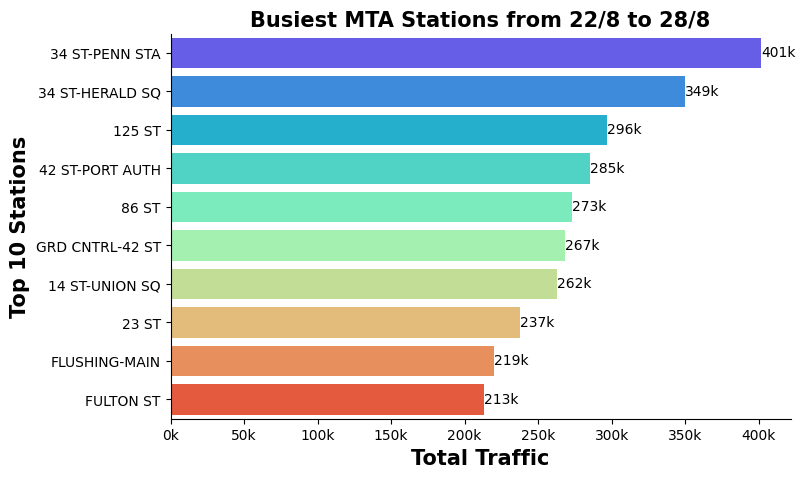

In [134]:
plt.figure(figsize=[8,5])
ax = sns.barplot(data=group_station.head(10).reset_index(),x='ENTRY_EXIT',y='STATION',palette='rainbow')
plt.xlabel('Total Traffic',weight='bold',fontsize=15)
plt.ylabel('Top 10 Stations',weight='bold',fontsize=15)
plt.xticks(range(0,400001,50000),[str(int(i/1000))+'k' for i in range(0,400001,50000)])
plt.title('Busiest MTA Stations from 22/8 to 28/8', weight='bold',fontsize='15')
for p in ax.patches:
        ax.annotate(str(int(p.get_width()/1000))+'k', (p.get_width(), p.get_y()+0.5))
sns.despine()
plt.savefig('barplot.png',transparent=True, bbox_inches='tight')

# Creating a horizontal bar plot of top 10 stations traffic from week 22/8/20 to 28/8/20

In [90]:
len(group_station)


379

/var/folders/91/gsb__vt94qx8xvz2j1fhktsc0000gn/T/ipykernel_2436/3947987689.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(group_station,bins=50,kde=False)


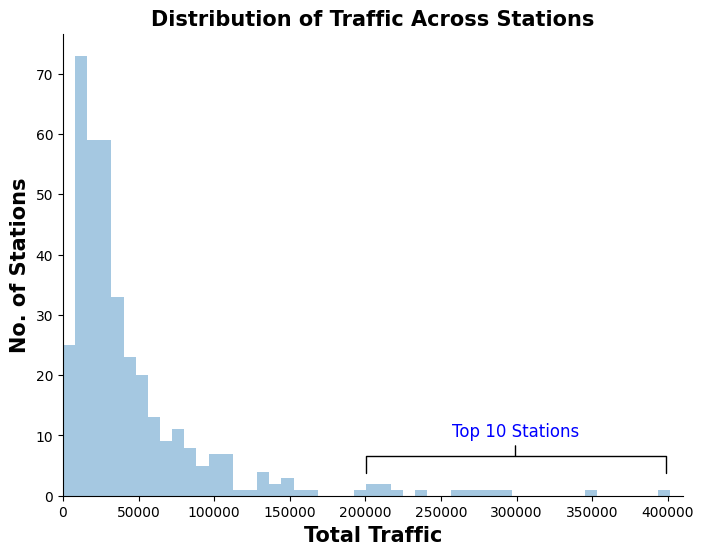

In [109]:
fig1 = plt.figure(figsize=[8,6])
ax1 = sns.distplot(group_station,bins=50,kde=False)
plt.xlim([0,410000])
plt.ylabel('No. of Stations',fontsize=15, weight='bold')
plt.xlabel('Total Traffic', fontsize=15, weight='bold')
ax1.annotate('Top 10 Stations', xy=(0.73, 0.08), xytext=(0.73, 0.12), xycoords='axes fraction', 
            fontsize=12, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=9.0, lengthB=1', lw=1.0),color='blue')
plt.title('Distribution of Traffic Across Stations',fontsize=15,weight='bold')
sns.despine()

plt.savefig('histplot.png',transparent=True, bbox_inches='tight')

# Checking Distribution of traffic in all stations, showing a right-skewed distribution
# Top 10 Stations represent an anomaly, and therefore should be the focus for the street teams given limited manpower resources

In [92]:
df['WEEKDAY'] = df['DATE'].dt.day_name()
group = df.groupby(['STATION','WEEKDAY'])['ENTRY_EXIT'].sum()
group = group.reset_index()
group.sort_values(by='ENTRY_EXIT').head(100)

# Finding all traffic a day in all stations

/var/folders/91/gsb__vt94qx8xvz2j1fhktsc0000gn/T/ipykernel_2436/2542633823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WEEKDAY'] = df['DATE'].dt.day_name()


,STATION,WEEKDAY,ENTRY_EXIT
2166,ORCHARD BEACH,Sunday,0.0
2169,ORCHARD BEACH,Wednesday,0.0
2163,ORCHARD BEACH,Friday,0.0
2165,ORCHARD BEACH,Saturday,0.0
2167,ORCHARD BEACH,Thursday,0.0
...,...,...,...
2096,NEWARK C,Sunday,716.0
1004,BEACH 36 ST,Sunday,719.0
451,39 AV,Sunday,733.0
1556,FRANKLIN ST,Saturday,738.0


In [93]:
group = group[group['STATION']!='ORCHARD BEACH']
# Orchard Beach station might be non-operational

<Axes: xlabel='WEEKDAY', ylabel='ENTRY_EXIT'>

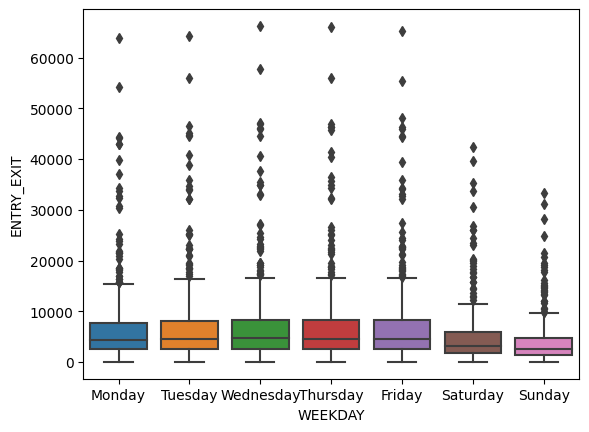

In [94]:
sns.boxplot(x='WEEKDAY',y='ENTRY_EXIT',data=group,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# boxplot of all week days confirmed the right skewed distribution with several extreme outliers

In [95]:
df_10 = df[df['STATION'].isin(list(group_station.head(10).index))]
df_10
# filter out dataframe for the top 10 stations for further data visualization

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRY_DELTA,EXIT_DELTA,ENTRY_DELTA_1,EXIT_DELTA_1,ENTRY_EXIT,WEEKDAY
2925,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,02:00:00,REGULAR,9247170,2202347,138.0,99.0,138.0,99.0,237.0,Saturday
2926,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,06:00:00,REGULAR,9247192,2202357,22.0,10.0,22.0,10.0,32.0,Saturday
2927,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,10:00:00,REGULAR,9247304,2202437,112.0,80.0,112.0,80.0,192.0,Saturday
2928,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,14:00:00,REGULAR,9247494,2202541,190.0,104.0,190.0,104.0,294.0,Saturday
2929,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,18:00:00,REGULAR,9247726,2202659,232.0,118.0,232.0,118.0,350.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197616,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,04:00:00,REGULAR,694272,1777400,4.0,1.0,4.0,1.0,5.0,Friday
197617,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,08:00:00,REGULAR,694276,1777613,4.0,213.0,4.0,213.0,217.0,Friday
197618,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,12:00:00,REGULAR,694303,1777995,27.0,382.0,27.0,382.0,409.0,Friday
197619,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,16:00:00,REGULAR,694400,1778301,97.0,306.0,97.0,306.0,403.0,Friday


In [96]:
df_10['WEEKDAY'] = df_10['DATE'].dt.day_name()
df_10

/var/folders/91/gsb__vt94qx8xvz2j1fhktsc0000gn/T/ipykernel_2436/2114785335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['WEEKDAY'] = df_10['DATE'].dt.day_name()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRY_DELTA,EXIT_DELTA,ENTRY_DELTA_1,EXIT_DELTA_1,ENTRY_EXIT,WEEKDAY
2925,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,02:00:00,REGULAR,9247170,2202347,138.0,99.0,138.0,99.0,237.0,Saturday
2926,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,06:00:00,REGULAR,9247192,2202357,22.0,10.0,22.0,10.0,32.0,Saturday
2927,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,10:00:00,REGULAR,9247304,2202437,112.0,80.0,112.0,80.0,192.0,Saturday
2928,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,14:00:00,REGULAR,9247494,2202541,190.0,104.0,190.0,104.0,294.0,Saturday
2929,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,18:00:00,REGULAR,9247726,2202659,232.0,118.0,232.0,118.0,350.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197616,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,04:00:00,REGULAR,694272,1777400,4.0,1.0,4.0,1.0,5.0,Friday
197617,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,08:00:00,REGULAR,694276,1777613,4.0,213.0,4.0,213.0,217.0,Friday
197618,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,12:00:00,REGULAR,694303,1777995,27.0,382.0,27.0,382.0,409.0,Friday
197619,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,16:00:00,REGULAR,694400,1778301,97.0,306.0,97.0,306.0,403.0,Friday


In [97]:
group_station_day = df_10.groupby(['STATION','WEEKDAY'])['ENTRY_EXIT'].sum()
group_station_day

# Finding all traffic a day in the top 10 stations

STATION          WEEKDAY  
125 ST           Friday       48069.541287
                 Monday       44418.669718
                 Saturday     35352.666667
                 Sunday       28188.611979
                 Thursday     46910.372591
                                  ...     
GRD CNTRL-42 ST  Saturday     24343.611111
                 Sunday       18731.631944
                 Thursday     46418.000000
                 Tuesday      45138.000000
                 Wednesday    45829.000000
Name: ENTRY_EXIT, Length: 70, dtype: float64

In [98]:
matrix_station_day = group_station_day.unstack()
matrix_station_day.reset_index()
matrix_station_day = matrix_station_day.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
matrix_station_day = matrix_station_day.reindex(index=list(group_station.head(10).index))
matrix_station_day

WEEKDAY,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
STATION,,,,,,,
34 ST-PENN STA,63903.001602,64304.000025,66247.000000,65944.000000,65294.416667,42422.562500,33385.102539
34 ST-HERALD SQ,54277.995567,56004.999931,57715.999999,55887.000000,55324.638889,39598.843750,31155.716309
125 ST,44418.669718,46464.529996,47105.220714,46910.372591,48069.541287,35352.666667,28188.611979
42 ST-PORT AUTH,44105.076804,44474.030497,46078.014148,45814.013893,46356.164545,33792.341146,24899.040487
86 ST,42947.000000,44819.000000,46979.000000,46223.000000,45943.000000,26769.500000,19553.000000
GRD CNTRL-42 ST,42873.333333,45138.000000,45829.000000,46418.000000,44561.500000,24343.611111,18731.631944
14 ST-UNION SQ,39818.000000,40898.000000,44534.000000,41454.000000,44337.000000,30561.000000,21390.000000
23 ST,37074.998372,38743.937417,40521.717705,40385.011147,39505.750115,23391.437500,17730.897461
FLUSHING-MAIN,33653.000000,34600.000000,35520.000000,34849.000000,35864.000000,25965.000000,19195.000000


In [99]:
matrix_station_day.applymap(lambda x:str(round(x/1000,1))+'k')

WEEKDAY,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
STATION,,,,,,,
34 ST-PENN STA,63.9k,64.3k,66.2k,65.9k,65.3k,42.4k,33.4k
34 ST-HERALD SQ,54.3k,56.0k,57.7k,55.9k,55.3k,39.6k,31.2k
125 ST,44.4k,46.5k,47.1k,46.9k,48.1k,35.4k,28.2k
42 ST-PORT AUTH,44.1k,44.5k,46.1k,45.8k,46.4k,33.8k,24.9k
86 ST,42.9k,44.8k,47.0k,46.2k,45.9k,26.8k,19.6k
GRD CNTRL-42 ST,42.9k,45.1k,45.8k,46.4k,44.6k,24.3k,18.7k
14 ST-UNION SQ,39.8k,40.9k,44.5k,41.5k,44.3k,30.6k,21.4k
23 ST,37.1k,38.7k,40.5k,40.4k,39.5k,23.4k,17.7k
FLUSHING-MAIN,33.7k,34.6k,35.5k,34.8k,35.9k,26.0k,19.2k


In [100]:
array = np.array(matrix_station_day.applymap(lambda x:str(round(x/1000,1))+'k'))
array

array([['63.9k', '64.3k', '66.2k', '65.9k', '65.3k', '42.4k', '33.4k'],
       ['54.3k', '56.0k', '57.7k', '55.9k', '55.3k', '39.6k', '31.2k'],
       ['44.4k', '46.5k', '47.1k', '46.9k', '48.1k', '35.4k', '28.2k'],
       ['44.1k', '44.5k', '46.1k', '45.8k', '46.4k', '33.8k', '24.9k'],
       ['42.9k', '44.8k', '47.0k', '46.2k', '45.9k', '26.8k', '19.6k'],
       ['42.9k', '45.1k', '45.8k', '46.4k', '44.6k', '24.3k', '18.7k'],
       ['39.8k', '40.9k', '44.5k', '41.5k', '44.3k', '30.6k', '21.4k'],
       ['37.1k', '38.7k', '40.5k', '40.4k', '39.5k', '23.4k', '17.7k'],
       ['33.7k', '34.6k', '35.5k', '34.8k', '35.9k', '26.0k', '19.2k'],
       ['34.2k', '36.0k', '37.6k', '36.4k', '34.3k', '20.0k', '14.9k']],
      dtype=object)

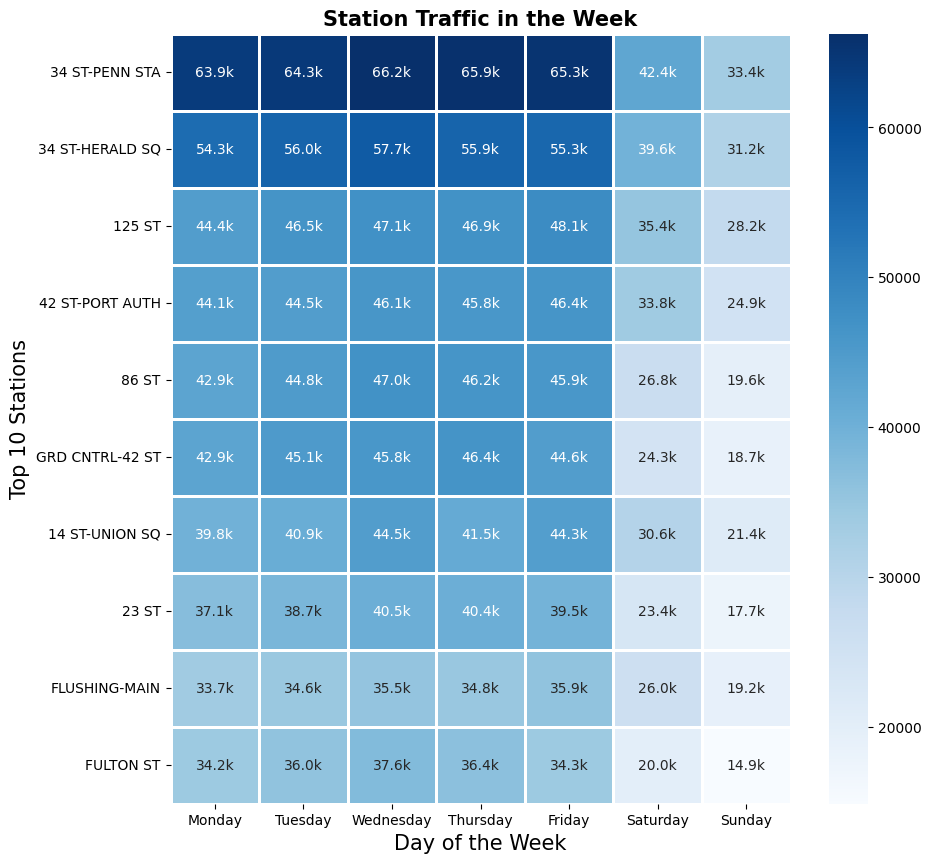

In [101]:
fig2 = plt.figure(figsize=[10,10])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax2 = sns.heatmap(matrix_station_day,cmap='Blues',linecolor='white',linewidths=1,annot = array,fmt='')
plt.xlabel('Day of the Week',fontsize=15)
plt.ylabel('Top 10 Stations',fontsize=15)   
plt.title('Station Traffic in the Week',weight='bold',fontsize=15)
plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')
# Creating heatmap of traffic a day in the top 10 stations.
# Trends reveal that traffic is higher on weekdays compared with weekends

In [102]:
def timeperiod(time):
    if time >= datetime.time(0,0,0) and time < datetime.time(4,0,0):
        return "12am-4am"
    elif time >= datetime.time(4,0,0) and time < datetime.time(8,0,0):
        return "4am-8am"
    elif time >= datetime.time(8,0,0) and time < datetime.time(12,0,0):
        return "8am-12pm"
    elif time >= datetime.time(12,0,0) and time < datetime.time(16,0,0):
        return "12pm-4pm"    
    elif time >= datetime.time(16,0,0) and time < datetime.time(20,0,0):
        return "4pm-8pm"    
    else:
        return "8pm-12am"  

In [103]:
df_10['TIME_PERIOD'] = df_10['TIME'].apply(timeperiod)
df_10

/var/folders/91/gsb__vt94qx8xvz2j1fhktsc0000gn/T/ipykernel_2436/1505836305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['TIME_PERIOD'] = df_10['TIME'].apply(timeperiod)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRY_DELTA,EXIT_DELTA,ENTRY_DELTA_1,EXIT_DELTA_1,ENTRY_EXIT,WEEKDAY,TIME_PERIOD
2925,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,02:00:00,REGULAR,9247170,2202347,138.0,99.0,138.0,99.0,237.0,Saturday,12am-4am
2926,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,06:00:00,REGULAR,9247192,2202357,22.0,10.0,22.0,10.0,32.0,Saturday,4am-8am
2927,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,10:00:00,REGULAR,9247304,2202437,112.0,80.0,112.0,80.0,192.0,Saturday,8am-12pm
2928,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,14:00:00,REGULAR,9247494,2202541,190.0,104.0,190.0,104.0,294.0,Saturday,12pm-4pm
2929,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,18:00:00,REGULAR,9247726,2202659,232.0,118.0,232.0,118.0,350.0,Saturday,4pm-8pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197616,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,04:00:00,REGULAR,694272,1777400,4.0,1.0,4.0,1.0,5.0,Friday,4am-8am
197617,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,08:00:00,REGULAR,694276,1777613,4.0,213.0,4.0,213.0,217.0,Friday,8am-12pm
197618,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,12:00:00,REGULAR,694303,1777995,27.0,382.0,27.0,382.0,409.0,Friday,12pm-4pm
197619,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,16:00:00,REGULAR,694400,1778301,97.0,306.0,97.0,306.0,403.0,Friday,4pm-8pm


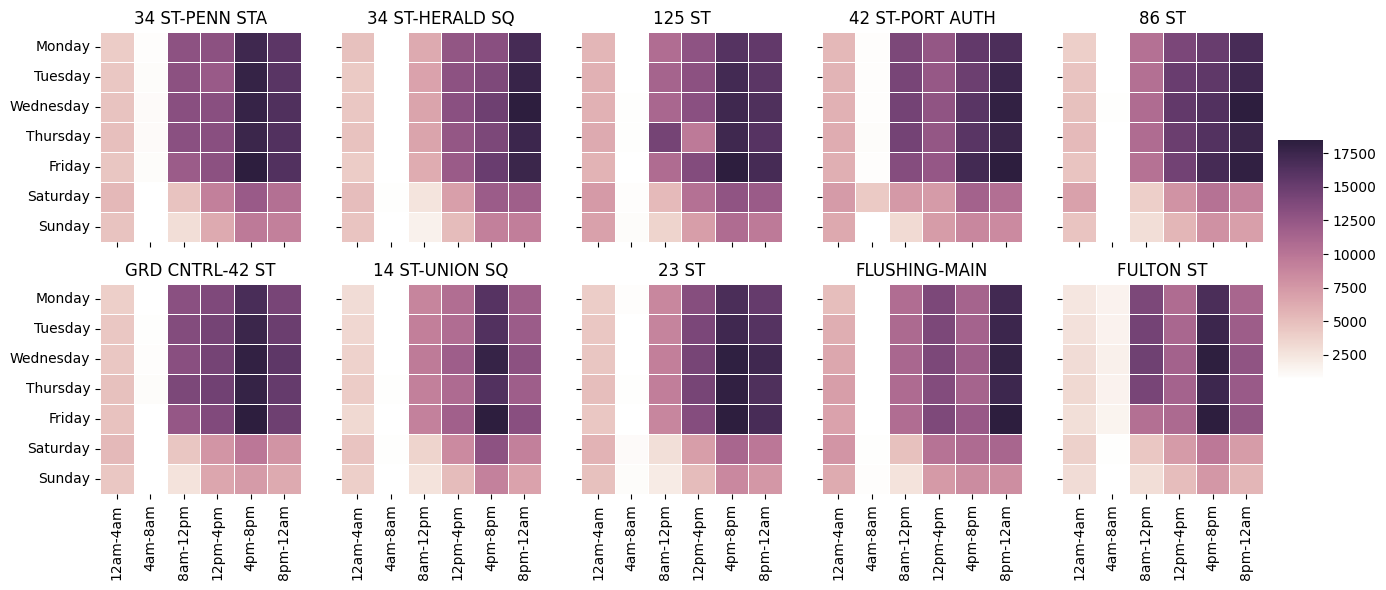

In [104]:
matrix_list= []
for station in list(group_station.head(10).index):
    df_station = df_10[df_10['STATION']==station]
    group_day_time = df_station.groupby(['WEEKDAY','TIME_PERIOD'])['ENTRY_EXIT'].sum()
    matrix_day_time = group_day_time.unstack()
    matrix_day_time.reset_index()   
    matrix_day_time = matrix_day_time.reindex(index=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
    matrix_day_time = matrix_day_time.reindex(columns=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])
    matrix_list.append(matrix_day_time)

fig, axn = plt.subplots(2,5, sharex=True, sharey=True, figsize=(15,6))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])  

for i, ax in enumerate(axn.flat):
    station = matrix_list[i]
    sns.heatmap(station, ax=ax, cmap=cmap,
                cbar=i == 0,
                cbar_ax=None if i else cbar_ax,
                linecolor='white',linewidths=0.5)
    ax.set_title(list(group_station.head(10).index)[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.savefig('heatmap2.png',transparent=True, bbox_inches='tight')
    # Creating heatmap of traffic based on day and time period for each of the 10 stations
    # Trend shows that traffic is heavier in the late afternoon and evening periods, even during weekdays
    # The trend reveals that the Covid pandemic could have caused many companies to adopt WFH arrangements, thus eliminating morning rush hours.
    # The trend reveals that the street teams should deploy manpower to these stations from late afternoon to late evenings.

In [105]:
df_10[(df_10['STATION']=='34 ST-PENN STA')&(df_10['WEEKDAY']=='Friday')&(df_10['TIME_PERIOD']=='4pm-8pm')]['ENTRY_EXIT'].mean()
# Check average traffic through a turnstile in 34 ST-PENN STATION on Friday at 4pm-8pm


188.29931972789123

In [106]:
df_10[(df_10['STATION']=='34 ST-PENN STA')&(df_10['WEEKDAY']=='Friday')&(df_10['TIME_PERIOD']=='4pm-8pm')]['ENTRY_EXIT'].count()
# Check number of turnstiles in 34 ST-PENN STATION

98

In [107]:
df_10['TRAFFIC_DELTA'] = df_10['ENTRY_DELTA_1'] - df_10['EXIT_DELTA_1']
df_10

/var/folders/91/gsb__vt94qx8xvz2j1fhktsc0000gn/T/ipykernel_2436/3713349183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['TRAFFIC_DELTA'] = df_10['ENTRY_DELTA_1'] - df_10['EXIT_DELTA_1']


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENTRY_DELTA,EXIT_DELTA,ENTRY_DELTA_1,EXIT_DELTA_1,ENTRY_EXIT,WEEKDAY,TIME_PERIOD,TRAFFIC_DELTA
2925,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,02:00:00,REGULAR,9247170,2202347,138.0,99.0,138.0,99.0,237.0,Saturday,12am-4am,39.0
2926,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,06:00:00,REGULAR,9247192,2202357,22.0,10.0,22.0,10.0,32.0,Saturday,4am-8am,12.0
2927,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,10:00:00,REGULAR,9247304,2202437,112.0,80.0,112.0,80.0,192.0,Saturday,8am-12pm,32.0
2928,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,14:00:00,REGULAR,9247494,2202541,190.0,104.0,190.0,104.0,294.0,Saturday,12pm-4pm,86.0
2929,N062A,R010,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,2020-08-22,18:00:00,REGULAR,9247726,2202659,232.0,118.0,232.0,118.0,350.0,Saturday,4pm-8pm,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197616,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,04:00:00,REGULAR,694272,1777400,4.0,1.0,4.0,1.0,5.0,Friday,4am-8am,3.0
197617,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,08:00:00,REGULAR,694276,1777613,4.0,213.0,4.0,213.0,217.0,Friday,8am-12pm,-209.0
197618,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,12:00:00,REGULAR,694303,1777995,27.0,382.0,27.0,382.0,409.0,Friday,12pm-4pm,-355.0
197619,N508,R453,00-00-05,23 ST,FM,IND,2020-08-28,16:00:00,REGULAR,694400,1778301,97.0,306.0,97.0,306.0,403.0,Friday,4pm-8pm,-209.0


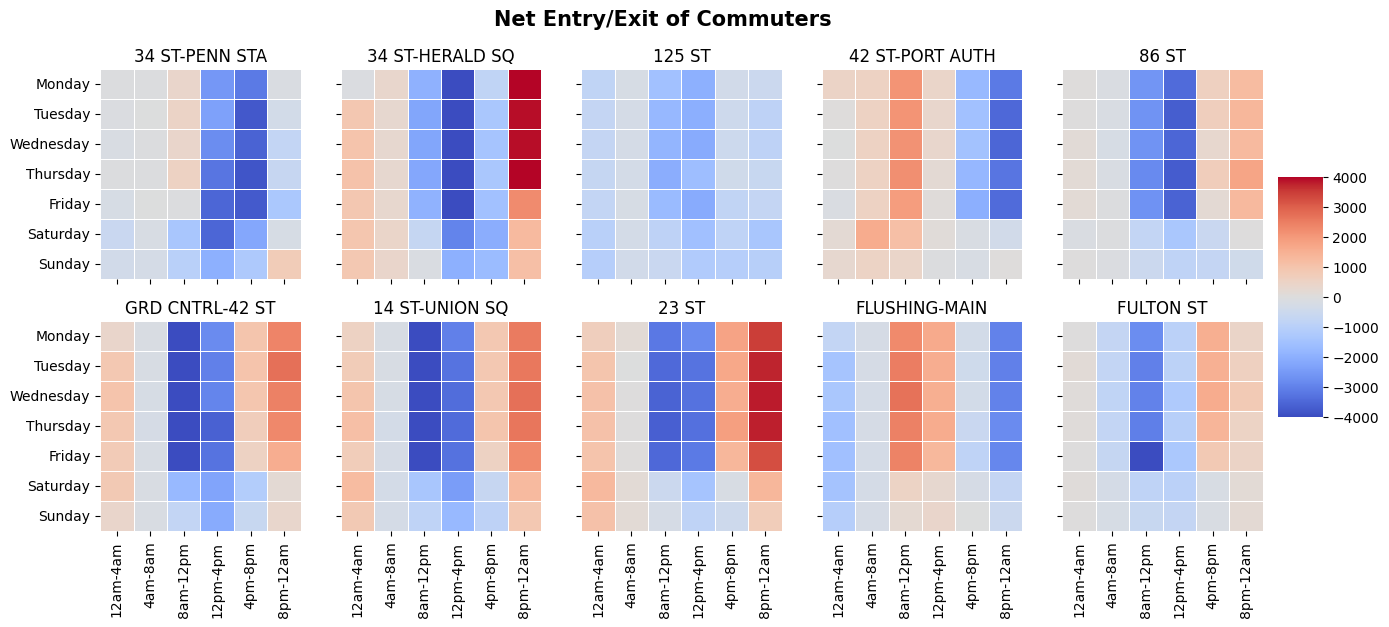

In [108]:
matrix_list= []
for station in list(group_station.head(10).index):
    df_station = df_10[df_10['STATION']==station]
    group_day_time = df_station.groupby(['WEEKDAY','TIME_PERIOD'])['TRAFFIC_DELTA'].sum()
    matrix_day_time = group_day_time.unstack()
    matrix_day_time.reset_index()   
    matrix_day_time = matrix_day_time.reindex(index=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
    matrix_day_time = matrix_day_time.reindex(columns=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])
    matrix_list.append(matrix_day_time)

fig, axn = plt.subplots(2,5, sharex=True, sharey=True, figsize=(15,6))
plt.suptitle('Net Entry/Exit of Commuters', weight='bold',fontsize=15)    
cbar_ax = fig.add_axes([.91, .3, .03, .4])  

for i, ax in enumerate(axn.flat):
    station = matrix_list[i]
    sns.heatmap(station, ax=ax, cmap='coolwarm',
                cbar=i == 0,
                cbar_ax=None if i else cbar_ax,
                linecolor='white',linewidths=0.5,vmin=-4000,vmax=4000)
    ax.set_title(list(group_station.head(10).index)[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.savefig('heatmap3.png',transparent=True, bbox_inches='tight')  

# Creating heatmap of traffic delta based on day and time period for each of the 10 stations
# Trend reveals stations which are in potential residential and commerical areas.